## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo V - Redes neurais auto-associativas e geradoras</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

## Parte 1 - Exercícios Essenciais

### Exercício 1)

Auto-encoders são apropriados para tarefas de aprendizado não supervisionado, em que os dados de entrada são reconstruídos e uma representação compacta destes dados é aprendida. Em relação a esse método, qual afirmação está incorreta?

a) A função de custo Mean Square Error deve ser utilizada com o propósito de medir a eficiência do aprendizado da rede, em que se considera seu potencial de obter imagens com alto grau de similaridade em relação às imagens de entrada.

b) Podemos utilizar um auto-encoder para ser treinado com exemplos não rotulados e reaproveitar somente o Encoder para formar uma CNN com adição de novas camadas para a predição com posterior fine-tuning. 

c) Auto-encoders overcomplete obtém naturalmente códigos compactos e de baixa dimensionalidade, similar a projeção PCA nos principais componentes considerando dimensionalidade menor do que a da entrada.

d) Denoising auto-encoderes são arquiteturas que podem ser utilizadas para duas tarefas simultaneamente após o seu treinamento. O primeiro deles é fornecer espaço de características que representam um conjunto de dados. O segundo propósito é funcionar como um filtro para remoção de ruídos.

---

### Exercício 2)

É correto afirmar sobre a principal tarefa realizada pela família de métodos do tipo Autoencoder

(a) Mapeia os dados de entrada em um espaço latente que melhor permita uma boa classificação dos dados de treinamento, sendo o foco principal do aprendizado aumento de acurácia<br>
(b) Mapeia os dados de entrada em um espaço latente, e posteriormente aprende uma reconstrução desse espaço latente novamente no espaço de entrada, sendo o foco principal do aprendizado obter um espaço latente compacto e representativo.<br>
(c) Mapeia os dados de entrada no espaço de saída num problema similar à regressão, em que temos informações a priori sobre como reconstruir os dados de entrada<br>
(d) Mapeia os dados de entrada com principal objetivo de eliminar o ruído dos dados e portanto é útil para tarefas de limpeza de dados.<br>

### Exercício 3)

Autoencoders do tipo Overcomplete possuem dimensão latente superior a da entrada. Como garantir o aprendizado sem que haja uma cópia simples dos dados?

(a) Utilizando mais camadas, projetando um Autoencoder Overcomplete Profundo que permita obter uma camada latente com maior qualidade<br>
(b) Substituindo a função de custo de perda ou erro quadrático pela função de custo de entropia cruzada<br>
(d) Utilizando normalização do tipo Batch ou Layer para que os dados sejam modificados ao longo da rede neural, assim evitando que haja uma cópia direta da entrada para o código<br>
(d) Impondo uma restrição na projeção do código que penalize o uso de todas as dimensões do espaço latente e privilegie projeções esparsas para uma dada instância.<br>

### Exercício 4)

Em geral qual modelo: Variational Autoencoder (VAE) ou Generative Adversarial Network (GAN) é mais difícil de treinar e por que?

a) GANs, pois estamos tentando otimizar 2 modelos simultâneamente e de forma adversarial<br>
b) VAEs, pois sua perda é complexa de calcular<br>
c) GANs, pois necessitam de muita aumentação de dados<br>
d) VAEs, pois precisam aprender distribuições de dados para dois modelos (encoder e decoder)<br>

---

### Exercício 5)

Carregue a base de dados `smartphone_activity_dataset.csv`, que possui 6 classes, conforme abaixo. Utilizaremos os primeiros 70% exemplos como treinamento e o restante como teste.

Defina as sementes `seed(1)` e `set_seed(2)`. Logo após, projete e instancie um Encoder (apenas encoder, não é necessário um AE aqui) com as seguintes camadas, sendo que, após a entrada, todas terão ativação tangente hiperbólica:
* Entrada
* Densa com metade das dimensões da entrada (use a divisão inteira //2)
* Densa com um quarto das dimensões da entrada (use a divisão inteira //4)
* Densa com 32 dimensões (use name="code" nessa camada para facilitar)

Sem realizar treinamento, passe os dados de treinamento e teste pela rede, obtendo as ativações da última camada, com 32 dimensões. Isso gera uma projeção aleatória.

Carregue o classificador SVC da biblioteca sklearn, e treine com parâmetros C=1, random_state=1, kernel="linear" com as características obtidas da rede neural de treinamento, realizando a predição no teste a seguir, medindo a acurácia por meio da função score.

Qual foi o resultado de acurácia obtido?

(a) Acurácia de um classificador aleatório<br>
(b) Acurácia abaixo de 5%<br>
(c) Acurácia no intervalo entre 45% e 65%<br>
(d) Acurácia acima de 75%<br>

 **Justificativa**: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("smartphone_activity_dataset.csv")
df

In [ ]:
rotulos = np.array(df['activity'])
features = np.array(df.iloc[:, :-1])

x_train, x_test, y_train, y_test = train_test_split(features, rotulos, test_size=0.30, random_state=0)
print("Exemplos de treinamento:", len(x_train))
print("Exemplos de teste:", len(x_test))

### Parte 2 - Exercícios complementares

---
### Exercício 6)

Você treinou uma GAN, porém enquanto a perda do discriminador esteve sempre decrescente a perda do gerador cresceu no treino. Qual dos procedimentos abaixo tem a menor chance de auxiliar no treinamento:

a) Reduzir a taxa de aprendizado do discriminador<br>
b) Aumentar a capacidade do discriminador e reduzir a do gerador<br>
c) Regularizar ou aumentar a regularização do discriminador<br>
d) Fazer mais de uma atualização do gerador para cada atualização dos pesos do discriminador<br>

---

### Exercício 7)

Uso de GANs para aprendizado de representações. Utilizando a mesma base de dados do exercício anterior, projete e treine uma GAN para gerar exemplos artificiais da base de dados `smartphone_activity_dataset.csv`. Utilizaremos todos os exemplos para treinamento da GAN.

Para isso, utilize a GAN similar à proposta em aula, alterada conforme o código abaixo, com as seguintes configurações:
* discriminador com uma camada oculta com 32 dimensões (utilize o parâmetro `name='embedding'` nessa camada para facilitar seu uso posterior), deve ser treinado com Adam e taxa de aprendizado 0.0001 (apenas para o discriminador)
* gerador com 2 camadas ocultas com 256 neurônios
* dimensão de z = 256
* dimensão de entrada igual a da base de dados
* função de distribuição alvo deve amostrar da base de dados

Todas as camadas serão `tanh` exceto a camada de saída do discriminador que é `sigmoid`.

Treine a GAN por 1000 épocas com batch size 32 e otimizador Adam com learning rate =0.001.

Após, utilize a camada "embedding" do discriminador como extratora de características, passando os dados da base de treinamento e teste (na mesma divisão feita na questão anterior) para o discriminador, e pegando a projeção feita pela camada densa. 

Treine classificadores SVM com parâmetros C=1 e random_state=1, um na base de dados com suas características originais, e o outro nas característias do "embedding" do discriminador. Obtenha o score nos respectivos conjuntos de teste. Os resultados estão em qual intervalo? 

(a) Original = [92,100], Embedding 32d GAN = [92,97], a GAN foi capaz de aprender uma boa representação compacta com acurácia próxima da original sendo a quantidade de épocas suficiente para esse aprendizado<br>
(b) Original = [85,91], Embedding 32d GAN = [82,89], a GAN produz representação similar aos dados originais, porém com menor dimensionalidade, indicando que houve convergência<br>
(c) Original = [85,91], Embedding 32d GAN = [23,30], a GAN gera uma representação que produz classificação próxima da aleatória<br>
(d)  Original = [92,100], Embedding 32d GAN = [82,89], a GAN gera uma representação compacta com resultado abaixo da original, sendo necessário executar por mais épocas para investigar se é capaz de gerar uma representação mais fiel aos dados<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed

In [ ]:
# modelo discriminador base : classificador
def discriminator(dim_input=2, embedding_size=128):
    model = models.Sequential()
    model.add(layers.Dense(embedding_size, activation='tanh', name='embedding', input_dim=dim_input))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    return model

def distribuicao_alvo(n, x_train):
    labels_reais = np.ones((n,1))
    return x_train[np.random.choice(x_train.shape[0], n, replace=False), :], labels_reais

# modelo gerador, cuja entrada tem dimensão do espaço latente
# sua saída tem dimensão igual a dos exemplos da distribuição alvo
def generator(z_dim, dim_output=2, embedding_size1=256, embedding_size2=256):
    model = models.Sequential()
    model.add(layers.Dense(embedding_size1, activation='tanh', name='embedding1', input_dim=z_dim))
    model.add(layers.Dense(embedding_size2, activation='tanh', name='embedding2'))
    model.add(layers.Dense(dim_output, activation='tanh'))
    return model

# funcao para gerar uma amostra com n exemplos da distribuicao latente
def amostra_distribuicao_latente(z_dim, n):
    exemplos_z = np.random.randn(z_dim * n)
    return exemplos_z.reshape(n, z_dim)

# funcao para gerar exemplos "falsos", aleatorios a partir da
# saída do gerador G(z)
def gera_exemplos_falsos(model_g, z_dim, n):
    exemplos_z = amostra_distribuicao_latente(z_dim, n)
    exemplos_falsos = model_g.predict(exemplos_z)
    labels_falsos = np.zeros((n,1))
    return exemplos_falsos, labels_falsos

In [ ]:
def GAN(model_gen, model_dis):
    # o discriminador sera treinado separadamente, entao marcamos como
    # nao treinável dentro desse modelo
    model_dis.trainable = False

    # criamos modelo que gera exemplos, depois os passa ao discriminador
    model_gan = models.Sequential()
    model_gan.add(model_gen)
    model_gan.add(model_dis)
    model_gan.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
    return model_gan

def fit_GAN(model_gen, model_dis, model_GAN, z_dim, x_train, epochs=1000, batch_size=32, verbose=False):
    histR = np.zeros(epochs)
    histF = np.zeros(epochs)
    for i in range(epochs):
        # amostra exemplos para o discriminador
        x_real, y_real = distribuicao_alvo(batch_size//2, x_train)
        x_falso, y_falso = gera_exemplos_falsos(model_gen, z_dim, batch_size//2)
        # treina modelo em meio batch
        model_dis.train_on_batch(x_real, y_real)
        model_dis.train_on_batch(x_falso, y_falso)

        # exemplos da distribuicao latente
        z_batch = amostra_distribuicao_latente(z_dim, batch_size)
        # invertemos os labels aqui para treinar de forma a enganar o discriminador
        z_labels = np.ones((batch_size,1))
        model_GAN.train_on_batch(z_batch, z_labels)

        # avalia modelo discriminador atual
        loss_real, acc_real = model_dis.evaluate(x_real, y_real, verbose=0)
        loss_falso, acc_falso = model_dis.evaluate(x_falso, y_falso, verbose=0)
        histR[i] = loss_real
        histF[i] = loss_falso
        if (verbose and (i % 100 == 0)):
            print("Epoch: %d, Accuracy- real: %.2f falso: %.2f" % (i, acc_real, acc_falso))
            
    return histR, histF

In [ ]:
seed(1)
set_seed(2)

z_dim = 256

# obter modelo discriminador e gerador
# criar modelo GAN
# treinar GAN

In [ ]:
### utilizar GAN treinada para obter embedding para os dados de treinamento e teste

In [ ]:
### testar características obtidas a partir da GAN usando SVM

In [ ]:
### testar características obtidas originais usando SVM

---

### Exercício 8)

Interpolação utilizando código autoencoder. 

Crie um Autoencoder profundo do tipo Denoising Undercomplete para imagens da base de dados MNIST.

Para tornar o treinamento mais rápido utilizaremos apenas as 3000 primeiras imagens da base de dados de treinamento. Crie uma versão ruidosa do conjunto de treinamento conforme indicado no código.

O Autoencoder deve possuir a seguinte arquitetura no encoder (todas as camadas com ativação relu):

* Conv2D com 32 filtros 3x3, strides 2, zeropadding
* Conv2D com 32 filtros 3x3, strides 2, sem zeropadding
* MaxPooling2D com poolsize=2
* Densa com 32 dimensões (utilize name='code' para facilitar)

A seguir, deve possuir um decoder espelhado (com convoluções transpostas e upsampling), resultando na saida de mesma dimensão da entrada.


Antes de instanciar o modelo, inicialize as sementes com seed(1), set_seed(2). Depois, compile e treine com perda MSE, Otimizador SGD, taxa 0.01, momentum 0.95, por 25 épocas com batchsize 32.

Vamos agora obter interpolações de imagens utilizando os seus códigos. Para isso crie dois modelos, com base no treinado:

1. Encoder, que permite recuperar o código de uma imagem (camada 'code')
2. Decoder, que permite receber um código e retornar uma imagem

O segundo é mais complexo, exige que seja feita a montagem das camadas utilizando a seguinte instrução (estude com calma para entender):

In [ ]:
## cria nova camada de entrada para receber dimensionalidade do código
#input_code_layer = keras.layers.Input(shape=(code_dim))

## encadeia camadas a partir de 'inicio', nesse caso 6 - ajuste conforme necessário
#inicio = 6
#x = input_code_layer
#for layer in convae.layers[inicio:]:
#    x = layer(x)
    
#decoder = keras.models.Model(inputs=input_code_layer, outputs=x)

Obtenha as imagens de teste de índice 128 e 198, e então:
1. calcule seus códigos pelo encoder: code128 e code198;
2. gere 10 interpolações entre code128 e code198 combinando linearmente cada dimensão do vetor com ponderações entre 0 (que resulta apenas na imagem 128) e 1 (que resulta apenas na imagem 198);
3. passe cada vetor interpolado pelo decoder, obtendo imagens intermediárias;

OBS: os modelos esperam arrays em formatos específicos para predição, para passar uma única imagem use `model.predict(np.array([x_test[indice_imagem],]))`

Quais das imagens abaixo representa a saída da interpolação?

(a) <img src="ex5_8_alternativa_a.png" width=620></img><br>
(b) <img src="ex5_8_alternativa_b.png" width=620></img><br>
(c) <img src="ex5_8_alternativa_c.png" width=620></img><br>
(d) <img src="ex5_8_alternativa_d.png" width=620></img><br>

Dataset size:
60000 train samples
10000 test samples


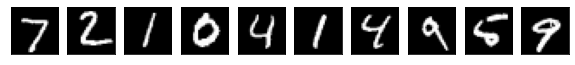

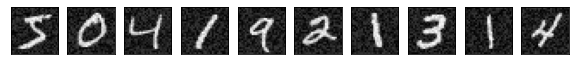

In [5]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from tensorflow.random import set_seed

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# os pixels das imagens sao reescalados para melhor processamento
# em particular divide-se por 255 para que os valores fiquem entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print('Dataset size:')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

img_rows, img_cols = x_train.shape[1], x_train.shape[2]
input_shape = (img_rows, img_cols, 1, )
n_classes = 10

n=10
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

seed(1)
set_seed(2)

## gerando dados ruidosos a serem oferecidos na entrada (a saída deve ser x_train[:3000])
noisy_train = x_train[:3000] + np.random.random(x_train[:3000].shape)*0.3

n=10
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(noisy_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()